<a href="https://colab.research.google.com/github/thiagorayam/Data/blob/master/Exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/thiagorayam/Data/master/Consumo_cerveja.csv",encoding = "ISO-8859-1", decimal=",")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [0]:
df=df.rename(columns={"Temperatura Media (C)": "Tmed", "Temperatura Minima (C)": "Tmin", "Temperatura Maxima (C)": "Tmax", "Consumo de cerveja (litros)":"Consumo"})

In [3]:
df.head()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [40]:
df['Tmed'].describe()

count    365.000000
mean      21.226356
std        3.180108
min       12.900000
25%       19.020000
50%       21.380000
75%       23.280000
max       28.860000
Name: Tmed, dtype: float64

In [41]:
df['Tmin'].describe()

count    365.000000
mean      17.461370
std        2.826185
min       10.600000
25%       15.300000
50%       17.900000
75%       19.600000
max       24.500000
Name: Tmin, dtype: float64

In [42]:
df['Tmax'].describe()

count    365.000000
mean      26.611507
std        4.317366
min       14.500000
25%       23.800000
50%       26.900000
75%       29.400000
max       36.500000
Name: Tmax, dtype: float64

In [43]:
df['Consumo'].describe()

count      365.000000
mean     25401.367123
std       4399.142703
min      14343.000000
25%      22008.000000
50%      24867.000000
75%      28631.000000
max      37937.000000
Name: Consumo, dtype: float64

# **-> Definição dos tipos**


In [0]:
df.dtypes

Data                  object
Tmed                 float64
Tmin                 float64
Tmax                 float64
Precipitacao (mm)    float64
Final de Semana      float64
Consumo               object
dtype: object

In [0]:
df['Data'] = df['Data'].astype('category')
df['Consumo'] = df['Consumo'].astype('float64')
df['Consumo']=df['Consumo']*1000 

In [0]:
df.shape

(941, 8)

# **-> Tratamento de dados ausentes**

In [0]:
df.isnull().sum()

Data                 576
Tmed                 576
Tmin                 576
Tmax                 576
Precipitacao (mm)    576
Final de Semana      576
Consumo              576
dtype: int64

In [0]:
df.isnull()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
936,True,True,True,True,True,True,True
937,True,True,True,True,True,True,True
938,True,True,True,True,True,True,True
939,True,True,True,True,True,True,True


Como todos os valores nulos estão agrupados, podemos eliminar todas as instâncias com a função dropna

In [0]:
df=df.dropna()

In [0]:
df.isnull().sum()

Data                 0
Tmed                 0
Tmin                 0
Tmax                 0
Precipitacao (mm)    0
Final de Semana      0
Consumo              0
dtype: int64

# **-> Normalização**

Visando obter uma variável que represente tanto a temperatura quanto a condição de chuva, foi criada uma variável clima. As variáveis 'Precipitacao' e 'Tmed' foram normalizadas para não existir influência das unidades utilizadas e tomar as duas variáveis com a mesma influência na nova variável.

In [0]:

df['Precipitacao_norm'] = (df['Precipitacao (mm)'] - df['Precipitacao (mm)'].min()) / (df['Precipitacao (mm)'].max() - df['Precipitacao (mm)'].min())

In [8]:
df['Precipitacao_norm']

0      0.000000
1      0.000000
2      0.000000
3      0.012658
4      0.000000
         ...   
360    0.143460
361    0.000000
362    0.108650
363    0.066456
364    0.000000
Name: Precipitacao_norm, Length: 365, dtype: float64

In [0]:

df['Tmed_norm'] = (df['Tmed'] - df['Tmed'].min()) / (df['Tmed'].max() - df['Tmed'].min())

In [10]:
df['Tmed_norm']

0      0.902256
1      0.884712
2      0.746867
3      0.694236
4      0.684211
         ...   
360    0.695489
361    0.610276
362    0.550125
363    0.531328
364    0.743108
Name: Tmed_norm, Length: 365, dtype: float64

In [0]:
df['Clima']=df['Tmed_norm'] - df['Precipitacao_norm']

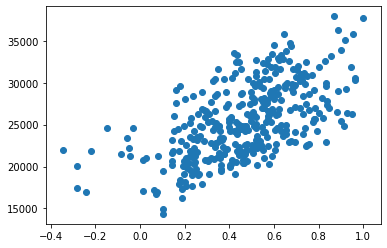

In [0]:
plt.scatter(x=df['Clima'],y=df['Consumo'])

# **-> Discretização**

In [0]:
df['Temp_dis'] = pd.qcut(df['Tmed'],3)

In [36]:
df['Temp_dis'].value_counts()

(22.573, 28.86]                 122
(12.899000000000001, 20.047]    122
(20.047, 22.573]                121
Name: Temp_dis, dtype: int64

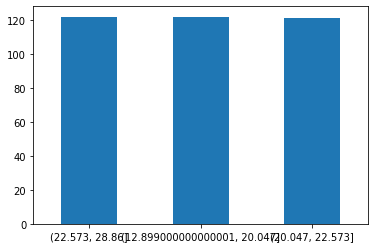

In [37]:
df['Temp_dis'].value_counts().plot.bar(rot=0)

# **->Limpeza dos dados**

In [0]:
df[df.duplicated()].sort_values("Clima").head()

,Data,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo,Precipitacao_norm,Tmed_norm,Clima


Os dados não possuem registros duplicados. Como os dados foram obtidos do site kaggle, eles já passaram por algum tratamento antes. Caso contrário, seria necessário utilizar o comando drop_duplicates para remover os dados duplicados.

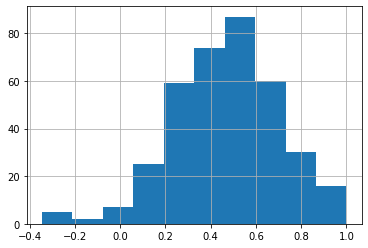

In [0]:
df['Clima'].hist()

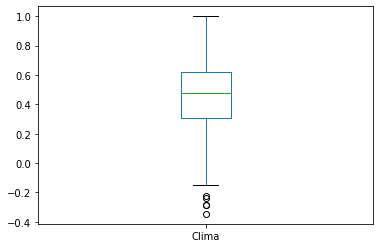

In [0]:
df['Clima'].plot.box()

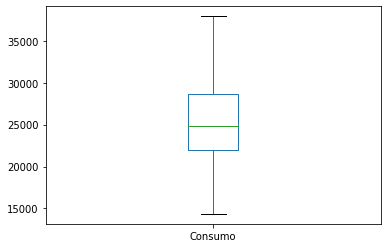

In [0]:
df['Consumo'].plot.box()

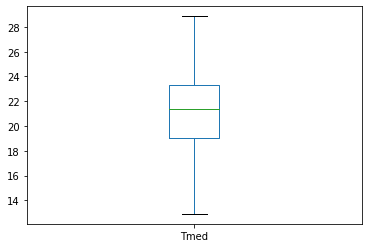

In [0]:
df['Tmed'].plot.box()

**Com intuito de identificar o comportamento separadamente dos dias de final de semana, foram criados os dados df1 e df2 abaixo**

In [0]:
df1=df[(df["Final de Semana"] == 1)]

In [0]:
df2=df[(df["Final de Semana"] == 0)]

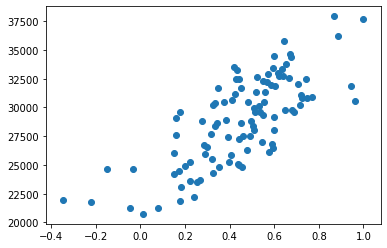

In [0]:
plt.scatter(x=df1['Clima'],y=df1['Consumo'])

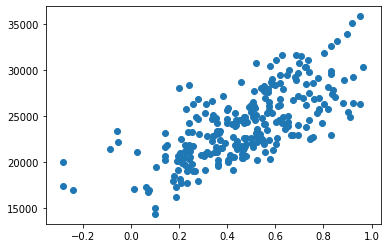

In [0]:
plt.scatter(x=df2['Clima'],y=df2['Consumo'])

**Para os dias de final de semana a melhor correlação obtida foi com a variável 'Clima' criada para traduzir o clima a partir das informações de temperatura e precipitação**

In [0]:
df1.corr(method='spearman')

,Tmed,Tmin,Tmax,Precipitacao (mm),Final de Semana,Consumo,Precipitacao_norm,Tmed_norm,Clima
Tmed,1.000000,0.874687,0.906752,0.026239,NaN,0.629538,0.026239,1.000000,0.870083
Tmin,0.874687,1.000000,0.663967,0.157762,NaN,0.450238,0.157762,0.874687,0.730329
Tmax,0.906752,0.663967,1.000000,-0.117222,NaN,0.690486,-0.117222,0.906752,0.848341
Precipitacao (mm),0.026239,0.157762,-0.117222,1.000000,NaN,-0.263124,1.000000,0.026239,-0.333944
Final de Semana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumo,0.629538,0.450238,0.690486,-0.263124,NaN,1.000000,-0.263124,0.629538,0.730481
Precipitacao_norm,0.026239,0.157762,-0.117222,1.000000,NaN,-0.263124,1.000000,0.026239,-0.333944
Tmed_norm,1.000000,0.874687,0.906752,0.026239,NaN,0.629538,0.026239,1.000000,0.870083
Clima,0.870083,0.730329,0.848341,-0.333944,NaN,0.730481,-0.333944,0.870083,1.000000


In [0]:
df['Consumo'].describe()

count      365.000000
mean     25401.367123
std       4399.142703
min      14343.000000
25%      22008.000000
50%      24867.000000
75%      28631.000000
max      37937.000000
Name: Consumo, dtype: float64